<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2024S1/blob/main/Lab_avaliativo_3b_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab Avaliativo

Conceitos verificados neste Lab:

1. `Pandas`, Aquisição e Inspeção de Dados
2. `Pandas`, Seleção de Dados
3. Distribuições e Análise de Dados
4. Matrizes com `NumPy`.

**Desenvolva somente as questões do seu questionário no Moodle.**

**Após responder o questionário faça um print do seu Colab em .pdf poste seu pdf.**

<br>

---



# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




## **CASE NYC Taxi**

Qual os destinos mais comuns? Qual o custo médio dos translados em NYC?

<br>
<br>

<img src="https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_manhattan.jpg" width=220, align="left">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[TLC Trip](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Explore aqui como é o tráfeco de Taxi na cidade de NYC, aqui os [dados](https://github.com/mwaskom/seaborn-data/raw/master/taxis.csv).

In [2]:
df = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/taxis.csv')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


\*

\* **IMPORTANTE: Para todas as questões seguintes exclua os valores nulos caso existam.**

\*

##### Q1. (NYC Taxi) Se existirem, exclua as linhas com valores nulos da base. Quantas linhas há antes e depois da exclusão dos valores nulos?

In [3]:
print('antes,', len(df))
df = df.dropna()
print('depois,', len(df))

antes, 6433
depois, 6341


##### Q2. (NYC Taxi) Quantos casos (instâncias ou linhas) existem das diferentes formas de pagamento?

In [4]:
df.payment.value_counts()

payment
credit card    4546
cash           1795
Name: count, dtype: int64

##### Q3. (NYC Taxi) Qual a quantidade de diferentes zonas de destino (`dropoff_zone`)?

In [5]:
df.dropoff_zone.nunique()

203

##### Q4. (NYC Taxi) Qual a zona de destino (`dropoff_zone`) com mais viagens?

In [6]:
df.dropoff_zone.value_counts()

dropoff_zone
Upper East Side North    244
Murray Hill              217
Midtown Center           215
Midtown East             175
Upper East Side South    173
                        ... 
Douglaston                 1
Stapleton                  1
Brighton Beach             1
Bensonhurst East           1
Inwood Hill Park           1
Name: count, Length: 203, dtype: int64

##### Q5. (NYC Taxi) Qual a vizinhança de destino (`dropoff_borough`) mais frequente das 5 viagens mais caras (`fare`)?

In [7]:
df.nlargest(5,'fare')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.00,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
5567,2019-03-07 00:28:57,2019-03-07 02:02:55,1,25.51,93.50,0.00,0.00,94.80,green,credit card,Sunset Park West,Saint Albans,Brooklyn,Queens
5827,2019-03-05 10:34:36,2019-03-05 11:44:01,1,20.64,86.14,0.00,5.76,92.40,green,credit card,Coney Island,Upper East Side North,Brooklyn,Manhattan
6053,2019-03-05 07:23:49,2019-03-05 09:11:29,1,22.17,81.86,0.00,0.00,82.36,green,credit card,University Heights/Morris Heights,Yorkville East,Bronx,Manhattan
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


##### Q6. (NYC Taxi) Qual o preço médio das viagens (`fare`)?

In [8]:
df.fare.mean()

12.887930925721495

##### Q7. (NYC Taxi) Qual o preço médio das viagens (`fare`) com zona de destino (`dropoff_zone`) o `JFK Airport`?

In [9]:
df[ df.dropoff_zone == 'JFK Airport'].fare.mean()

48.70481481481482

##### Q8. (NYC Taxi) Qual percentual da quantidade de viagens tem como destino a zona (`dropoff_zone`) do `JFK Airport`?

In [10]:
len( df[ df.dropoff_zone == 'JFK Airport'] ) / len(df) * 100

0.8516006938968618

##### Q9. (NYC Taxi) Qual a vizinhança de destino (`dropoff_borough`) mais frequente das 5 corridas de maior distância?

In [11]:
df.nlargest(5,'distance')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.0,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
2397,2019-03-21 18:56:59,2019-03-21 19:49:58,1,30.23,52.0,13.11,5.76,78.67,yellow,credit card,JFK Airport,Meatpacking/West Village West,Queens,Manhattan
1535,2019-03-09 18:57:53,2019-03-09 19:49:53,1,28.30,52.0,2.00,5.76,63.06,yellow,credit card,World Trade Center,JFK Airport,Manhattan,Queens
3875,2019-03-30 17:07:48,2019-03-30 18:10:46,6,28.15,52.0,12.46,9.50,74.76,yellow,credit card,Financial District North,JFK Airport,Manhattan,Queens
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.5,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


##### Q10. (NYC Taxi) Qual a média e máximo número de passageiros nas viagens com destino à zona (`dropoff_zone`) do `JFK Airport`?

In [12]:
df[ df.dropoff_zone == 'JFK Airport'].passengers.mean(), df[ df.dropoff_zone == 'JFK Airport'].passengers.max()

(1.7777777777777777, 6)

##### Q11. (NYC Taxi) Qual a chance de uma viagem de taxi em NYC percorrer menos de 4 milhas e qual a distribuição desses dados de distância (faça um gráfico).

In [13]:
len( df[ df.distance < 4 ] ) / len(df)

0.8072859170477843

In [14]:
df.distance.quantile([.80])

0.8    3.86
Name: distance, dtype: float64

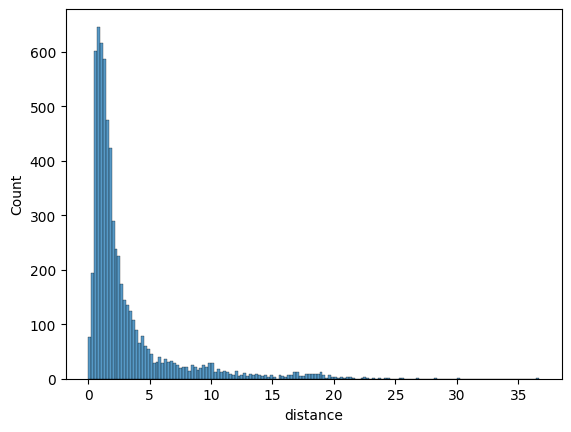

In [15]:
sns.histplot(df.distance)
plt.show()

##### Q12. (NYC Taxi) Qual a chance de uma viagem de taxi em NYC custar mais que 21 dólares e qual a distribuição desses valores (faça um gráfico).

In [16]:
len( df[ df.total > 21 ] ) / len(df)

0.23103611417757453

In [17]:
df.total.quantile([.75])

0.75    20.3
Name: total, dtype: float64

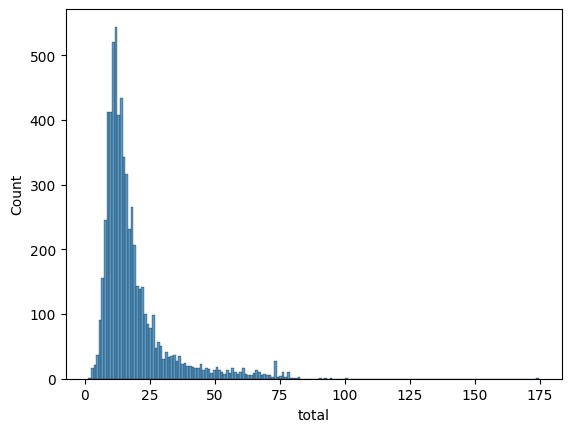

In [18]:
sns.histplot(df.total)
plt.show()

# [Chinese photographer wins prize at top photo contest](https://www.chinadaily.com.cn/china/2014-05/05/content_17485173.htm)


In [39]:
# %%capture
!wget https://www.chinadaily.com.cn/china/images/attachement/jpg/site1/20140505/eca86bd9dcd814d1880311.jpg

--2024-05-17 01:17:11--  https://www.chinadaily.com.cn/china/images/attachement/jpg/site1/20140505/eca86bd9dcd814d1880311.jpg
Resolving www.chinadaily.com.cn (www.chinadaily.com.cn)... 8.45.52.145, 8.45.52.147, 8.45.52.175, ...
Connecting to www.chinadaily.com.cn (www.chinadaily.com.cn)|8.45.52.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88216 (86K) [image/jpeg]
Saving to: ‘eca86bd9dcd814d1880311.jpg.1’

eca86bd9dcd814d1880 100%[===================>]  86.15K   532KB/s    in 0.2s    

2024-05-17 01:17:12 (532 KB/s) - ‘eca86bd9dcd814d1880311.jpg.1’ saved [88216/88216]



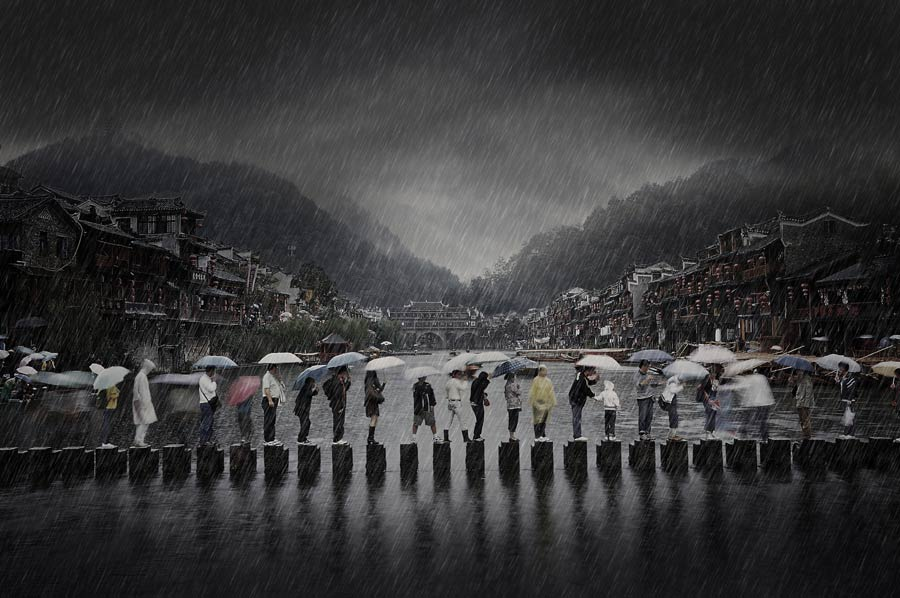

In [40]:
from PIL import Image

img = Image.open('eca86bd9dcd814d1880311.jpg')
img

**Rain in an Ancient Town by Chen Li.**

Q13. (China) Qual dimensão (altura e largura) em pixels da imagem e qual a soma dos valores dos pixels da componente X* de sua imagem?

<small>
X* = R, G ou B de acordo com sua prova

In [41]:
img_array = np.array(img)

In [42]:
print( img_array.shape[0:2], ', R =', img_array[:,:,0].sum())
print( img_array.shape[0:2], ', G =', img_array[:,:,1].sum())
print( img_array.shape[0:2], ', B =', img_array[:,:,2].sum())

(598, 900) , R = 29609819
(598, 900) , G = 29450442
(598, 900) , B = 29860996


Q14. (China) Divida sua imagem em 4 quadrantes. Qual a soma dos valores dos pixels do quadrante Q* da sua imagem?

<small>
Q* = Q1, Q2, Q3 ou Q4 de acordo com sua prova. A soma, agora é de todas componentes.

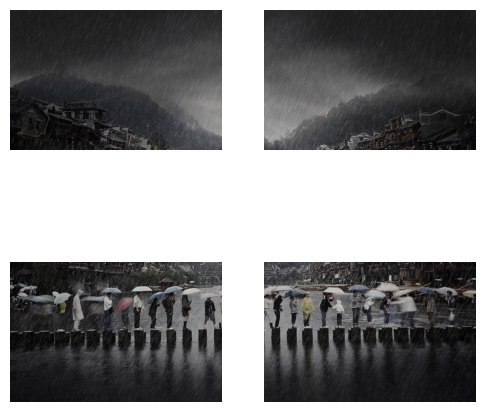

In [43]:
# Divide as dimensões da imagem
width, height = img_array.shape[1], img_array.shape[0]
half_width = width // 2
half_height = height // 2

# Extrai os quadrantes
q1 = img_array[0:half_height,0:half_width,:]
q2 = img_array[0:half_height,half_width::,:]
q3 = img_array[half_height::,0:half_width,:]
q4 = img_array[half_height::,half_width::,:]

# Exibe os quadrantes
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.imshow(Image.fromarray(q1))
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(Image.fromarray(q2))
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(Image.fromarray(q3))
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(Image.fromarray(q4))
plt.axis('off')

plt.show()

In [44]:
print('Q1 = ',q1.sum())
print('Q2 = ',q2.sum())
print('Q3 = ',q3.sum())
print('Q4 = ',q4.sum())

Q1 =  21129197
Q2 =  23247078
Q3 =  21828929
Q4 =  22716053


Q15. (China) **PARCIALMENTE RESOLVIDO** Converta a imagem  para tons de cinza (somente uma componente de cor) e aplique a máscara de convolução laplaciana. Qual a soma da matriz de pixel após a convolução (`result.sum()`)?



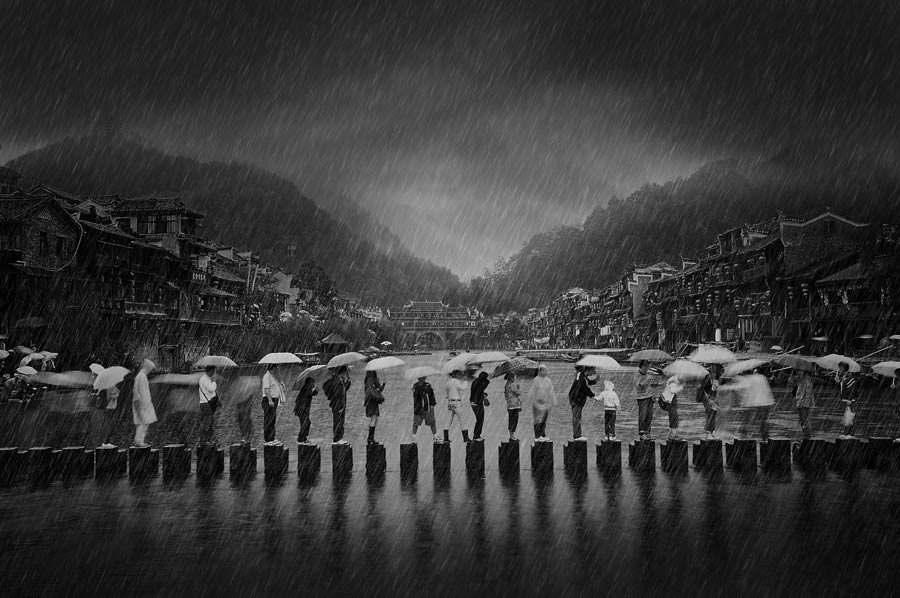

In [45]:
# Converte a imagem para escala de cinza
img = img.convert("L")

img

In [46]:
def conv_matrix(matriz, kernel): # Veja exemplo no GitHub

  result = np.zeros([matriz.shape[0]-2,matriz.shape[1]-2])

  for i in range(result.shape[0]):
    for j in range(result.shape[1]):
      janela = matriz[i:i+3, j:j+3]  # seleciona a janela 3x3
      result[i, j] = np.sum(janela * kernel)  # aplica a convolução

  return result

In [47]:
laplace = np.array([[0,  1,  0],
                    [1, -4,  1],
                    [0,  1,  0]])

In [48]:
result = conv_matrix(np.array(img), laplace)

In [49]:
result.sum()

60.0

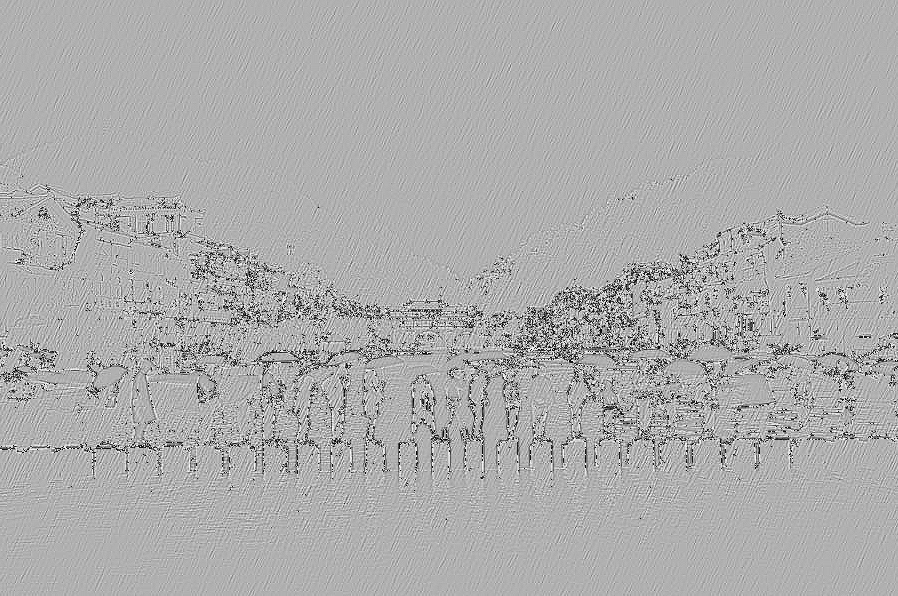

In [50]:
Image.fromarray(( result - 80 ).astype(np.uint8))